# Opis Danych

https://www.kaggle.com/code/rafaaell/mobile-price-predicition-random-forest

#### Ten zbiór danych zawiera szczegółowe informacje o telefonach komórkowych i ich cechach. Oto pełna lista zmiennych i ich znaczenie:

1. id - Unikalny identyfikator każdego telefonu.
2. battery_power - Całkowita energia, jaką bateria może przechować, wyrażona w mAh.
3. blue - Informacja, czy telefon obsługuje Bluetooth (1 - tak, 0 - nie).
4. clock_speed - Prędkość, z jaką mikroprocesor wykonuje instrukcje (w GHz).
5. dual_sim - Informacja, czy telefon obsługuje dwie karty SIM (1 - tak, 0 - nie).
6. fc - Rozdzielczość przedniego aparatu w megapikselach.
7. four_g - Informacja, czy telefon obsługuje sieć 4G (1 - tak, 0 - nie).
8. int_memory - Ilość pamięci wewnętrznej wyrażona w gigabajtach (GB).
9. m_dep - Głębokość telefonu (grubość obudowy) w centymetrach.
10. mobile_wt - Waga telefonu w gramach.
11. n_cores - Liczba rdzeni procesora.
12. pc - Rozdzielczość tylnego aparatu w megapikselach.
13. px_height - Wysokość rozdzielczości ekranu w pikselach.
14. px_width - Szerokość rozdzielczości ekranu w pikselach.
15. ram - Pamięć RAM w megabajtach (MB).
16. sc_h - Wysokość ekranu telefonu w centymetrach.
17. sc_w - Szerokość ekranu telefonu w centymetrach.
18. talk_time - Maksymalny czas rozmowy na jednym ładowaniu baterii (w godzinach).
19. three_g - Informacja, czy telefon obsługuje sieć 3G (1 - tak, 0 - nie).
20. touch_screen - Informacja, czy telefon posiada ekran dotykowy (1 - tak, 0 - nie).
21. wifi - Informacja, czy telefon obsługuje Wi-Fi (1 - tak, 0 - nie).

price_range, to zmienna docelowa, która klasyfikuje telefony na podstawie ich przedziału cenowego. Przyjmuje następujące wartości:

- 0 - Telefon niskobudżetowy (low cost).
- 1 - Telefon średniobudżetowy (medium cost).
- 2 - Telefon z wyższej półki cenowej (high cost).
- 3 - Telefon bardzo drogi (very high cost).

# Załodwanie bibliotek 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import accuracy_score

import scipy.stats as stats
from pyECLAT import ECLAT

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Wczytanie danych

train = pd.read_csv(r"C:\Users\tomek\Downloads\archive (2)\train.csv")
test = pd.read_csv(r"C:\Users\tomek\Downloads\test.csv")

## Przegląd zbioru danych

In [3]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
# Sprawdzenie nazw kolumn
columns = train.columns
columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
# podstawowe statystyki
train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [6]:
# informacje o kolumnach
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## Sprawdzanie brakujących lub zduplikowanych wartości (które mogą wpłynąć na klasyfikacje)

In [7]:
train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
train.duplicated().sum()

0

<Axes: >

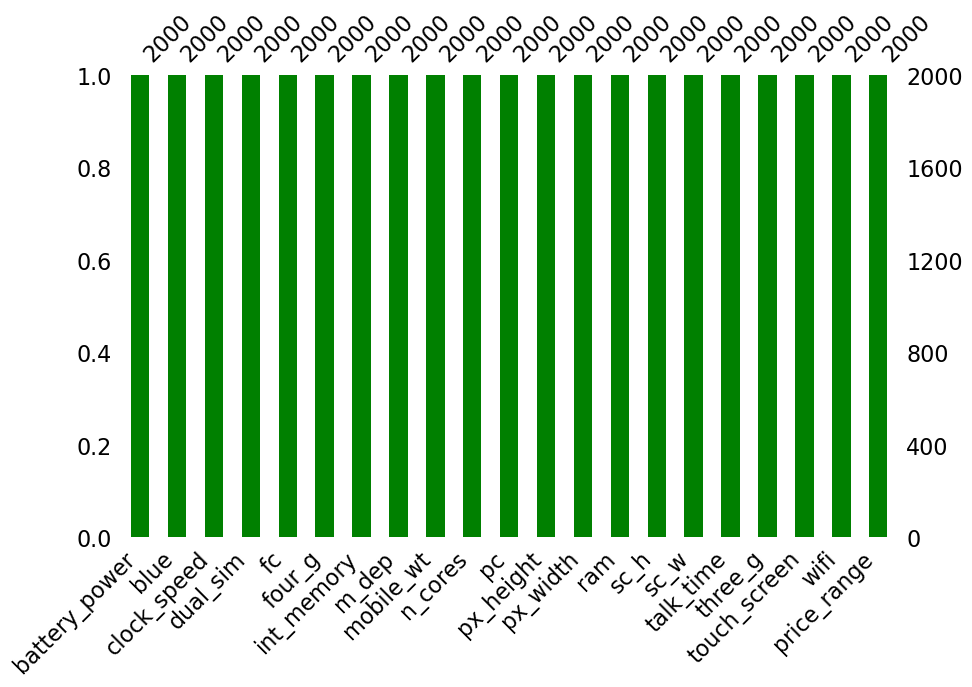

In [9]:
import missingno as msno

msno.bar(train , figsize=(10 ,6 ) ,color="green")

### Wyniki:
Zbiór danych jest dobrze przygotowany do analizy i modelowania, ponieważ:

- Nie zawiera brakujących danych, co pozwala uniknąć problemów z ich uzupełnianiem.
- Nie zawiera zduplikowanych wierszy, co zapewnia wiarygodność i unikalność każdej obserwacji.


## Proporcje przedziałów cenowych telefonów

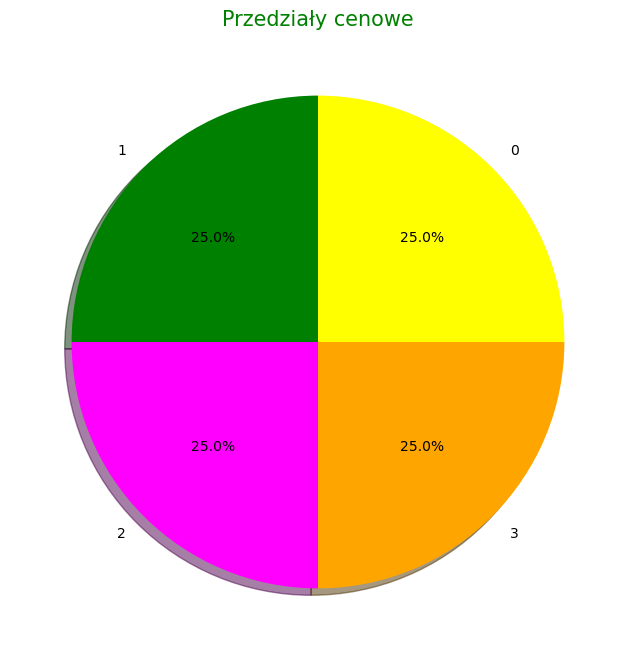

In [10]:
labels = train["price_range"].value_counts().index
sizes = train["price_range"].value_counts()
colors = ['green','magenta',"orange","yellow"]

plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=90)
plt.title('Przedziały cenowe',color = 'green',fontsize = 15)
plt.show()

### Wyniki: 
Zrównoważony zbiór danych
- Rozkład zmiennej docelowej jest równomierny, co oznacza, że model predykcyjny uczący się na tym zbiorze danych nie będzie faworyzował żadnej z klas.

## Macierz korrelacji

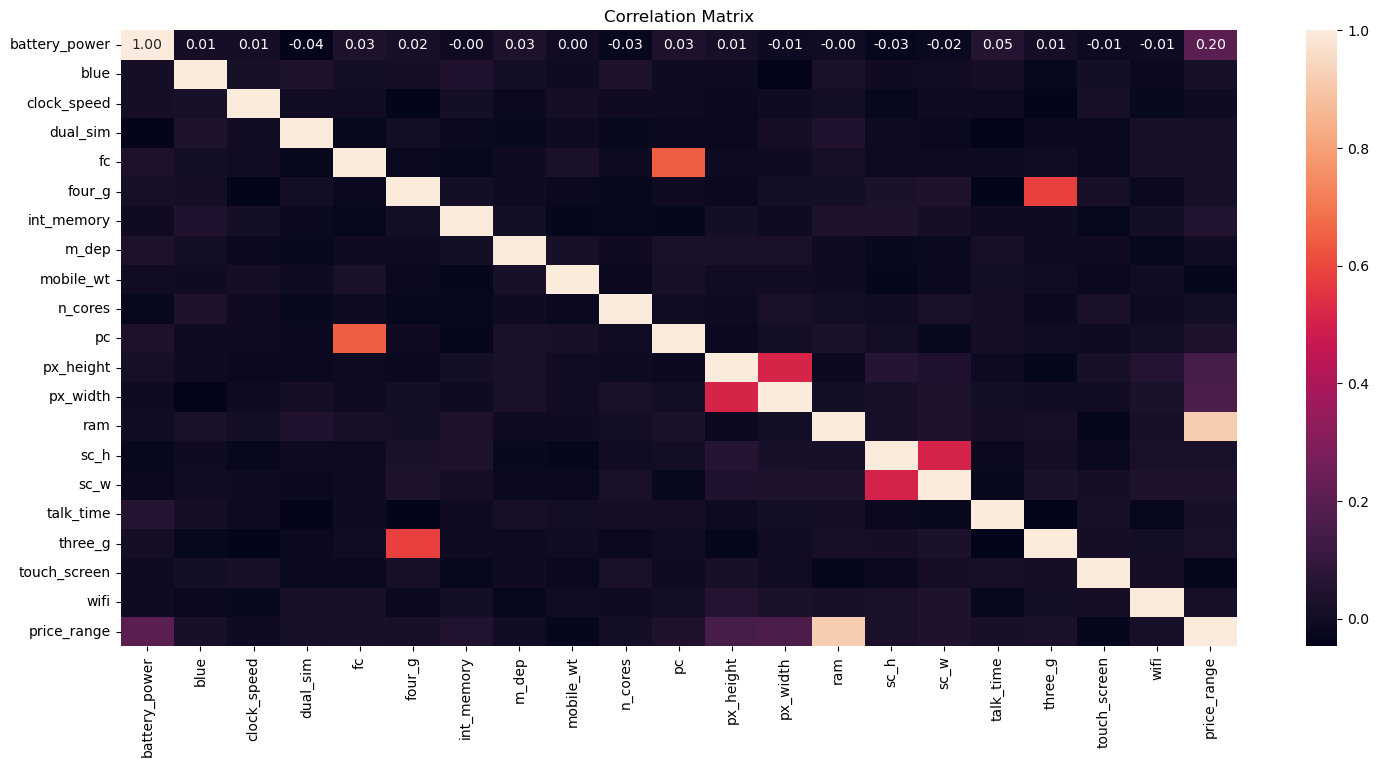

In [11]:
plt.figure(figsize=(18,8))
plt.title("Correlation Matrix")
sns.heatmap(train.corr() , fmt=".2f" , annot=True )

plt.show()

### Wnioski:
Zmienne o silnej korelacji z price_range:

- ram (0.92): Pamięć RAM ma bardzo silną dodatnią korelację z price_range. Oznacza to, że większa ilość RAM-u jest silnie związana z wyższym przedziałem cenowym telefonu.
- battery_power (0.20): Istnieje umiarkowana korelacja między pojemnością baterii a przedziałem cenowym. Telefony z większą pojemnością baterii są częściej w wyższych przedziałach cenowych.
- px_height (0.15) i px_width (0.17): Rozdzielczość ekranu (wysokość i szerokość w pikselach) jest umiarkowanie dodatnio skorelowana z przedziałem cenowym. Wyższa rozdzielczość wiąże się z droższymi telefonami.


## Podzielenie na zbiór treningowy i testowy 

In [12]:
y = train['price_range']
X = train.drop('price_range' , axis =1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
968,1923,0,0.5,1,7,0,46,0.5,191,1,10,767,1759,1489,10,9,3,1,1,1
240,633,1,2.2,0,0,1,49,0.1,139,8,1,529,1009,3560,11,1,16,1,1,1
819,1236,0,0.9,1,2,1,57,0.1,188,1,14,517,809,1406,14,12,20,1,0,1
692,781,0,1.1,0,2,0,38,0.4,198,5,7,304,1674,3508,13,8,5,0,0,1
420,1456,1,0.5,1,7,0,7,0.4,105,5,12,823,1104,1587,6,5,20,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1975,1,1.9,1,2,0,31,0.9,151,1,17,775,1607,3022,13,5,19,0,0,1
1294,589,1,0.5,0,1,1,59,0.7,146,8,4,759,1858,362,16,10,6,1,1,1
860,1829,1,0.5,0,0,1,15,0.4,160,5,7,729,1267,2080,16,11,12,1,0,1
1459,1927,0,0.9,1,3,0,11,0.4,190,8,12,491,1506,2916,16,11,18,0,1,1


## Normlizacja danych

StandardScaler to narzędzie w bibliotece scikit-learn używane do normalizacji danych poprzez standaryzację. Jego celem jest przekształcenie cech tak, aby miały one średnią równą 0 i odchylenie standardowe równe 1. Dzięki temu różnice w jednostkach pomiędzy cechami (np. wiek w latach i dochód w dolarach) są eliminowane, co pozwala na równoważenie wpływu różnych zmiennych w modelach.

In [14]:
# Normalizacja zmiennych

scaler = StandardScaler()

features = ['battery_power' ,'blue', 'clock_speed' ,'dual_sim' , 'fc' , 'four_g', 'int_memory' ,  'm_dep' ,'mobile_wt'  , 'n_cores' , 'pc', 
            'px_height' , 'px_width' , 'ram' ,'sc_h' , 'sc_w' ,'talk_time' ,'three_g' , 'touch_screen' , 'wifi']

norm = scaler.fit_transform(X_train[features])    # Normalizacja
df_norm = pd.DataFrame(norm , columns = features) # Stworsznie DataFrame
df_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,1600.0,1.909584e-16,1.000313,-1.679133,-0.882474,-0.022263,0.858375,1.718586
blue,1600.0,-5.551115e-18,1.000313,-0.981423,-0.981423,-0.981423,1.018929,1.018929
clock_speed,1600.0,-2.620126e-16,1.000313,-1.236230,-1.022798,-0.016617,0.867602,1.812802
dual_sim,1600.0,-1.554312e-17,1.000313,-1.030464,-1.030464,0.970437,0.970437,0.970437
fc,1600.0,1.110223e-16,1.000313,-0.993561,-0.763036,-0.301987,0.620111,3.386407
four_g,1600.0,3.996803e-17,1.000313,-1.046060,-1.046060,0.955968,0.955968,0.955968
int_memory,1600.0,-1.709743e-16,1.000313,-1.664149,-0.894473,0.012645,0.864786,1.744415
m_dep,1600.0,2.975398e-16,1.000313,-1.403674,-1.054989,-0.008935,1.037119,1.734488
mobile_wt,1600.0,2.220446e-16,1.000313,-1.716351,-0.895452,0.010367,0.859573,1.680472
n_cores,1600.0,-1.809664e-16,1.000313,-1.547446,-0.673800,-0.236977,1.073493,1.510316


## Redukcja wymiarów za pomocą PCA (test Bartletta)


In [15]:
scaler = StandardScaler()

# Scaling up training data
X_train_scaled = scaler.fit_transform(X_train)

# Scaling up testing data
X_test_scaled = scaler.transform(X_test)

##  Test sferyczności Bartletta

Test sferyczności Bartletta służy do sprawdzenia, czy macierz korelacji między zmiennymi różni się istotnie od macierzy jednostkowej (tożsamościowej). Jest to istotne w analizach wielowymiarowych, takich jak analiza głównych składowych (PCA) czy analiza czynnikowa, gdzie założenie o korelacji między zmiennymi jest kluczowe.

#### Krótka charakterystyka metody:

- H0 - Macierz korelacji jest jednostkowa, co oznacza brak istotnych korelacji między zmiennymi.
- H1 - Macierz korelacji różni się od macierzy jednostkowej, co sugeruje istnienie istotnych korelacji między zmiennymi.
- Statystyka testowa: Test opiera się na statystyce chi-kwadrat, która ocenia, jak bardzo macierz korelacji odbiega od macierzy jednostkowej.

In [16]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value, p_value = calculate_bartlett_sphericity(df_norm)

print("Chi-square value:", chi_square_value)
print("P-value:", p_value)

Chi-square value: 2613.376169942073
P-value: 0.0


### Wnioski:
Ponieważ 𝑝 = 0, odrzucamy hipotezę zerową na poziomie istotności 0.05. Wynik wskazuje, że zmienne w zbiorze danych są ze sobą skorelowane, co oznacza, że zastosowanie metod takich jak PCA (Principal Component Analysis) lub analiza czynnikowa (Factor Analysis) jest uzasadnione.

## Analiza PCA (Principal component analysis) 

#### Cel PCA
Głównym celem PCA (Analizy Głównych Składowych) jest redukcja wymiarowości danych przy zachowaniu jak największej ilości informacji. PCA przekształca oryginalne zmienne w zestaw nowych zmiennych (główne składowe), które są liniowo niezależne i maksymalizują wariancję danych.

#### Krótka charakterystyka metody
- Przekształcenie danych: Dane są przekształcane w nowe osie (główne składowe), które maksymalizują wariancję.
- Wybór liczby składowych: Liczbę składowych wybiera się w oparciu o wyjaśnioną wariancję – zazwyczaj tak, aby osiągnąć określony próg (np. 95% wariancji).

#### Jak działa PCA
- Wyliczenie macierzy kowariancji.
- Wyznaczenie wartości własnych i wektorów własnych macierzy kowariancji.
- Przekształcenie danych w nowe główne składowe.
- Obliczenie udziału każdej składowej w wyjaśnionej wariancji.

In [17]:
def compute_pca_variance(x):
    total_variance = []
    for n in range(1, len(x.columns) + 1):  # Iterujemy przez liczbę składowych
        pca = PCA(n_components=n)
        pca.fit(x)  # Dopasowanie PCA do danych
        total_variance.append(sum(pca.explained_variance_ratio_))
    
    return total_variance
    
# Zastosowanie PCA
X_scaled_df = pd.DataFrame(X_test, columns=X_train.columns)
total_variance = compute_pca_variance(X_scaled_df)

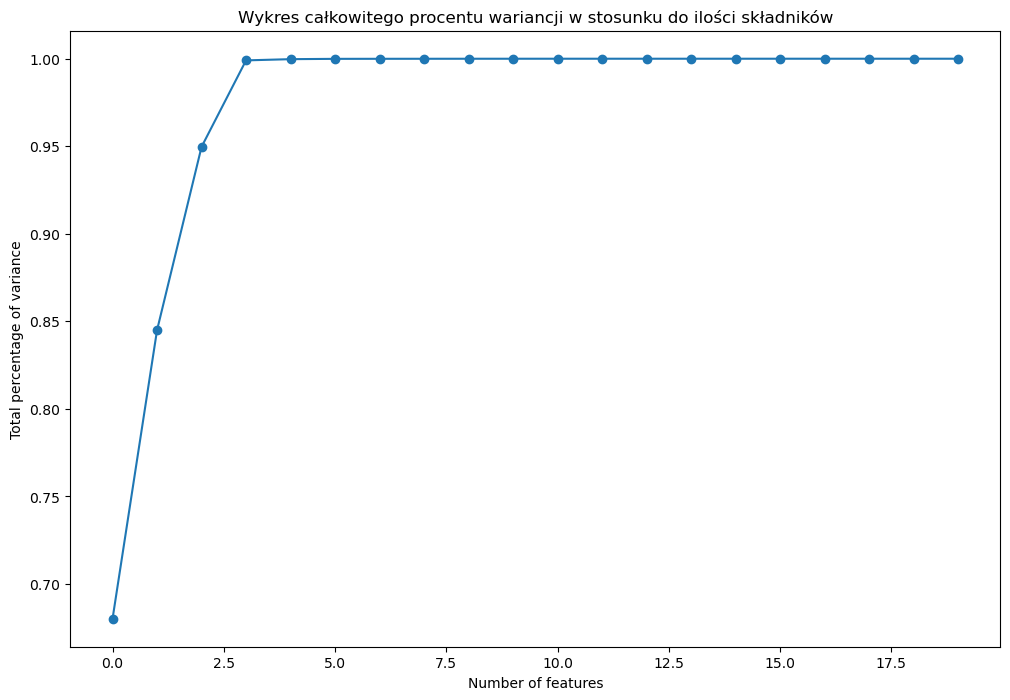

In [18]:
# Wykres całkowitego procentu wariancji w stosunku do ilości składników
component_number=np.arange(20)

plt.figure(figsize=(12,8))
plt.plot(component_number, total_variance,marker='o')
plt.xlabel("Number of features")
plt.ylabel("Total percentage of variance")
plt.title("Wykres całkowitego procentu wariancji w stosunku do ilości składników")
plt.show()

Z wielu metod wyboru liczby znaczących składowych wybraliśmy jedną polegającą na obliczeniu całkowitego procentu wariancji w stosunku do ilości składników. Po analizie wykresu zauważyliśmy, że 4 składowe wyjaśniają, aż 95% wariancji. 

In [19]:
# Wybór liczby składowych na podstawie wykresu
optimal_components = np.argmax(np.array(total_variance) >= 0.95) + 1  # Liczba składowych dla progu 95%
print(f"Optymalna liczba składowych (dla progu 95%): {optimal_components}")

Optymalna liczba składowych (dla progu 95%): 4


## Drzewa decyzyjne 

Drzewo decyzyjne to graf bez cykli (pętli), w którym istnieje tylko jedna ścieżka między dwoma różnymi węzłami. Drzewo decyzyjne tworzy strukturę w postaci "drzewa", gdzie każdy węzeł decyzyjny reprezentuje pytanie o cechę, a gałęzie odpowiedzi na to pytanie prowadzą do kolejnych węzłów, aż do osiągnięcia liścia, który wskazuje przewidywaną klasę.

#### Krótka charakterystyka metody:

1. Podział danych: Algorytm dokonuje podziału danych na podstawie wartości cech, które najlepiej rozdzielają klasy.
2. Kryterium podziału: Popularne metody doboru najlepszego podziału to miary takie jak Entropia lub Indeks Giniego .
3. Rekurencyjne dzielenie: Podział jest powtarzany rekurencyjnie na mniejsze podzbiory, aż do momentu, gdy osiągniemy "liście", które są czystymi klasami.

#### Jak działa klasyfikacja drzewa decyzyjnego:

1. Wybór cechy: Na każdym węźle drzewa wybierana jest cecha, która najlepiej rozdziela dane na różne klasy. Cechą tą może być np. wiek, dochód, temperatura.
2. Podział: Na podstawie wybranej cechy, zbiór danych jest dzielony na dwie lub więcej grup.
3. Kontynuacja dzielenia: Proces powtarza się rekurencyjnie dla każdej nowej grupy.
4. Końcowe przewidywanie: Gdy nie można już podzielić zbioru (np. w wyniku braku dostępnych cech), drzewo przypisuje do danego liścia klasę.

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

def train(X_train, X_test, y_train, y_test):
    
    tree = DecisionTreeClassifier(criterion="entropy")
    
    param_grid = {       #zbiór parametrów do przetestowania
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 5, 10]
    }
    
    grid_search = GridSearchCV(   #przycinanie drzewa za pomocą gridsearch
        estimator=tree,
        param_grid=param_grid,
        scoring='accuracy',
        cv=5,
        verbose=1,
        n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)

    best_tree = grid_search.best_estimator_

    y_train_pred = best_tree.predict(X_train)
    y_test_pred = best_tree.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    return train_accuracy, test_accuracy, best_tree


## Sieci neuronowe

Sieć neuronowa to model obliczeniowy inspirowany strukturą ludzkiego mózgu, który składa się z połączonych jednostek nazywanych neuronami. Neurony są zorganizowane w warstwy: wejściową, ukryte i wyjściową.

#### Krótka charakterystyka metody:
1. Wejście i wyjście: Sieć neuronowa przyjmuje dane wejściowe, przetwarza je przez warstwy ukryte, a na końcu produkuje wynik na wyjściu, który jest przewidywaną klasą lub wartością.
2. Uczenie się: Sieć neuronowa uczy się poprzez proces zwany uczeniem nadzorowanym, w którym na podstawie danych wejściowych i odpowiadających im etykiet (klas) modyfikuje swoje wagi, aby minimalizować błąd w przewidywaniach.
3. Algorytm wstecznej propagacji: W procesie uczenia sieć wykorzystuje algorytm wstecznej propagacji (backpropagation), który pozwala na aktualizację wag neuronów poprzez obliczenie gradientu błędu i jego propagację wstecz do wszystkich warstw.

#### Jak działa klasyfikacja w sieciach neuronowych:
1. Inicjalizacja wag: Na początku sieć losowo inicjalizuje wagi neuronów, które są następnie dostosowywane podczas procesu uczenia.
2. Przetwarzanie danych wejściowych: Każdy neuron w sieci odbiera dane wejściowe, przetwarza je za pomocą funkcji aktywacji i przekazuje wynik do neuronów w kolejnej warstwie.
3. Propagacja w przód: Dane przechodzą przez kolejne warstwy sieci, aż do warstwy wyjściowej, gdzie generowane jest przewidywanie.
4. Obliczanie błędu: Na podstawie różnicy między przewidywaną a rzeczywistą wartością obliczany jest błąd (strata), który zostaje wykorzystany do modyfikacji wag.
5. Uczenie i optymalizacja: Sieć powtarza proces propagacji w przód i wstecz, ucząc się na podstawie błędów, aż osiągnie zadowalającą dokładność w przewidywaniu.

In [22]:
from sklearn.neural_network import MLPClassifier

def train_neural_network(X_train, X_test, y_train, y_test):
    
    nn = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', 
                       max_iter=200, random_state=42)
    nn.fit(X_train, y_train)
    
    y_train_pred = nn.predict(X_train)
    y_test_pred = nn.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    return train_accuracy, test_accuracy, nn

In [23]:
results_train = {}
results_test = {}
results_train_neural={}
results_test_neural={}

In [24]:
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

results_train["Normal"], results_test["Normal"], model = train(X_train, X_test, y_train, y_test)
results_train["PCA"], results_test["PCA"], model_2 = train(X_train_pca, X_test_pca, y_train, y_test)


results_train_neural["Normal"], results_test_neural["Normal"], model_n = train_neural_network(X_train, X_test, y_train, y_test)
results_train_neural["PCA"], results_test_neural["PCA"], model_n_2 = train_neural_network(X_train_pca, X_test_pca, y_train, y_test)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits


## Porówananie wyników

Drzewo decyzyjne:
Normal - Train Accuracy: 0.9819, Test Accuracy: 0.8425
PCA - Train Accuracy: 0.9838, Test Accuracy: 0.8925
Sieci neuronowe:
Normal - Train Accuracy: 0.7344, Test Accuracy: 0.6400
PCA - Train Accuracy: 0.9194, Test Accuracy: 0.8575


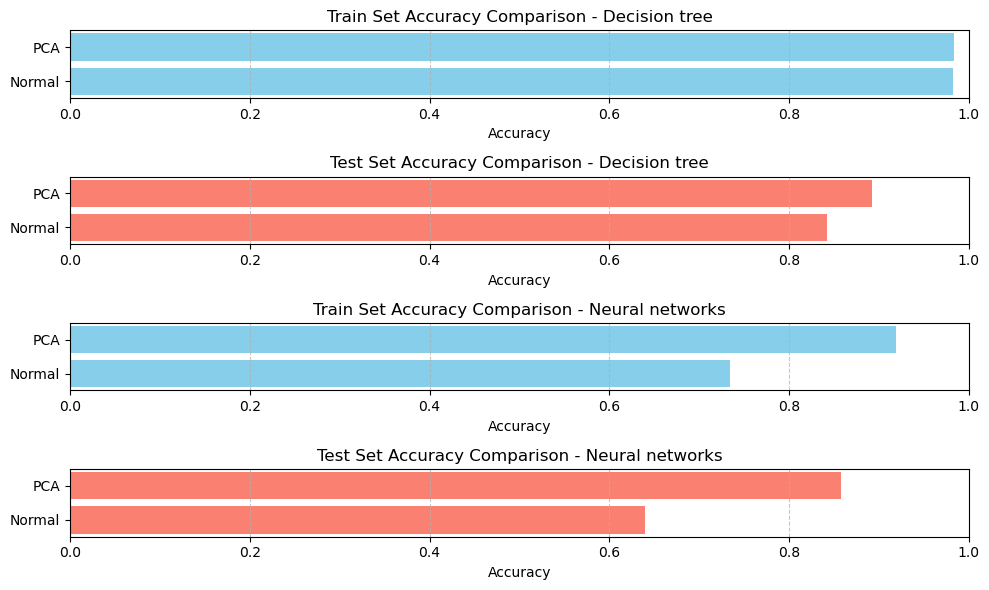

In [25]:
print("Drzewo decyzyjne:")
for method in results_train:
    print(f"{method} - Train Accuracy: {results_train[method]:.4f}, Test Accuracy: {results_test[method]:.4f}")
print("Sieci neuronowe:")
for method in results_train_neural:
    print(f"{method} - Train Accuracy: {results_train_neural[method]:.4f}, Test Accuracy: {results_test_neural[method]:.4f}")


methods = list(results_train.keys())
train_accuracies = list(results_train.values())
test_accuracies = list(results_test.values())
train_accuracies_neural = list(results_train_neural.values())
test_accuracies_neural = list(results_test_neural.values())

fig, ax = plt.subplots(4, 1, figsize=(10, 6))


ax[0].barh(methods, train_accuracies, color='skyblue')
ax[0].set_xlabel('Accuracy')
ax[0].set_title('Train Set Accuracy Comparison - Decision tree')
ax[0].set_xlim(0, 1)
ax[0].grid(axis='x', linestyle='--', alpha=0.7)


ax[1].barh(methods, test_accuracies, color='salmon')
ax[1].set_xlabel('Accuracy')
ax[1].set_title('Test Set Accuracy Comparison - Decision tree')
ax[1].set_xlim(0, 1)
ax[1].grid(axis='x', linestyle='--', alpha=0.7)

ax[2].barh(methods, train_accuracies_neural, color='skyblue')
ax[2].set_xlabel('Accuracy')
ax[2].set_title('Train Set Accuracy Comparison - Neural networks')
ax[2].set_xlim(0, 1)
ax[2].grid(axis='x', linestyle='--', alpha=0.7)

ax[3].barh(methods, test_accuracies_neural, color='salmon')
ax[3].set_xlabel('Accuracy')
ax[3].set_title('Test Set Accuracy Comparison - Neural networks')
ax[3].set_xlim(0, 1)
ax[3].grid(axis='x', linestyle='--', alpha=0.7)

fig.tight_layout()
plt.show()

## Podsumowanie i wnioski:

#### Drzewo decyzyjne:

Model PCA wykazuje nieco lepszą dokładność na danych testowych (0.85 vs. 0.82). To sugeruje, że zastosowanie PCA mogło pomóc w uzyskaniu lepszego ogólnienia modelu, eliminując nadmiarowe cechy lub szum w danych. Dzięki przycięciu drzewa udało się zapobiec efektu przeuczenia zbioru.

#### Sieci neuronowe:

Sieci neuronowe, w porównaniu, mają trudności z nauką na danych w pierwotnej formie, czego efektem jest niska dokładność na danych testowych. Sieć nie była w stanie efektywnie pracować z tak bardzo złożonym zbiorem, co skutkowało słabą generalizacją. Jednak po zastosowaniu PCA wyniki znacznie się poprawiły, zarówno na danych treningowych, jak i testowych, co wskazuje na to, że redukcja wymiarów pomogła sieci neuronowej lepiej poradzić sobie z danymi, eliminując szum i pozostawiając tylko najistotniejsze cechy.

Podsumowując, wyniki pokazują, że redukcja wymiarów może poprawić wyniki, w szczególności w przypadku sieci neuronowych. Możemy, więc zauważyć, że przy problemach, w których musimy zachować wysoką złożoność danych, lepszym rozwiązaniem będzie zastosowanie drzewa decyzyjnego. Nie możemy jednak zapomnieć o przycinaniu drzewa, w celu uniknięcia przeuczenia modelu. 

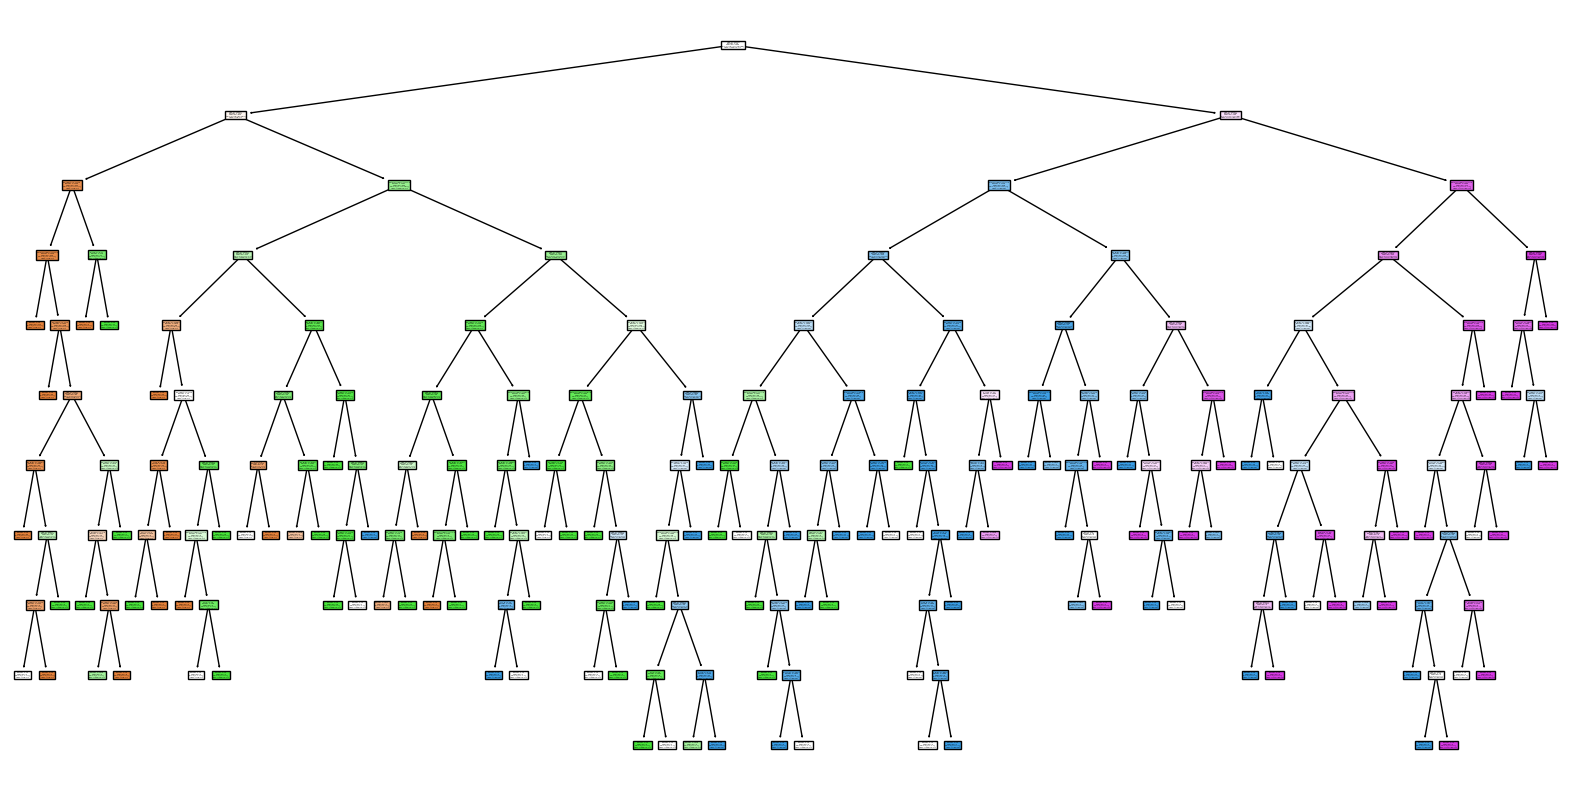

In [26]:
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=df_norm.columns, class_names=["low cost" , "medium cost" , "high cost" , "very high cost"])
plt.show()

## Algorytm apriori

#### Działanie metody apriori:

1. Znajdowanie częstych zestawów: Algorytm identyfikuje zestawy cech, które pojawiają się w danych z określoną częstotliwością, czyli które występują razem w transakcjach lub rekordach.

2. Generowanie reguł: Na podstawie częstych zestawów algorytm generuje reguły asocjacyjne w postaci „jeśli X, to Y”, gdzie X i Y to różne cechy w zestawie danych.

3. Ocena reguł: Reguły są oceniane przy użyciu metryk takich jak:

* Support: Częstotliwość występowania danego zestawu cech w zbiorze danych.
* Confidence: Prawdopodobieństwo, że obecność cech X wiąże się z obecnością cech Y.
* Lift: Miara siły związku między cechami, uwzględniająca, jak bardzo obecność X zwiększa prawdopodobieństwo Y w porównaniu do przypadkowego wystąpienia.

In [27]:
from mlxtend.frequent_patterns import apriori, association_rules


binary_features_with_price = X_train.copy()
binary_features_with_price['price_range'] = y_train

# Binarne przekształcenia
for feature in binary_features_with_price.columns:
    median_value = binary_features_with_price[feature].median()
    binary_features_with_price[feature] = (binary_features_with_price[feature] > median_value).astype(int)


frequent_itemsets = apriori(binary_features_with_price, min_support=0.1, use_colnames=True)


rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)


C:\Users\tomek\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [28]:
price_related_rules = rules[rules['consequents'].apply(lambda x: 'price_range' in x)]

print(price_related_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


                antecedents    consequents   support  confidence      lift
2                     (ram)  (price_range)  0.452500    0.905000  1.819095
4      (battery_power, ram)  (price_range)  0.245625    0.970370  1.950493
8               (blue, ram)  (price_range)  0.224375    0.899749  1.808541
12       (clock_speed, ram)  (price_range)  0.213750    0.902375  1.813818
27                (fc, ram)  (price_range)  0.210000    0.910569  1.830290
..                      ...            ...       ...         ...       ...
227   (wifi, px_width, ram)  (price_range)  0.129375    0.958333  1.926298
229       (sc_h, sc_w, ram)  (price_range)  0.143750    0.905512  1.820124
232  (sc_h, talk_time, ram)  (price_range)  0.103125    0.891892  1.792748
234       (wifi, sc_h, ram)  (price_range)  0.118750    0.909091  1.827318
236       (wifi, sc_w, ram)  (price_range)  0.105000    0.875000  1.758794

[102 rows x 5 columns]


In [29]:
top_rules = rules.sort_values(by=['confidence', 'lift'], ascending=False).head(10)

In [30]:
top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
74,"(battery_power, px_width, ram)",(price_range),0.115625,1.000000,2.010050
72,"(battery_power, px_height, ram)",(price_range),0.116250,0.994652,1.999301
209,"(px_height, px_width, ram)",(price_range),0.156875,0.992095,1.994161
189,"(n_cores, px_height, ram)",(price_range),0.109375,0.988701,1.987338
156,"(int_memory, px_width, ram)",(price_range),0.121875,0.979899,1.969647
201,"(pc, px_height, ram)",(price_range),0.108750,0.977528,1.964881
121,"(px_height, clock_speed, ram)",(price_range),0.105000,0.976744,1.963305
191,"(n_cores, px_width, ram)",(price_range),0.119375,0.974490,1.958773
58,"(battery_power, fc, ram)",(price_range),0.117500,0.974093,1.957976
154,"(int_memory, px_height, ram)",(price_range),0.115625,0.973684,1.957154


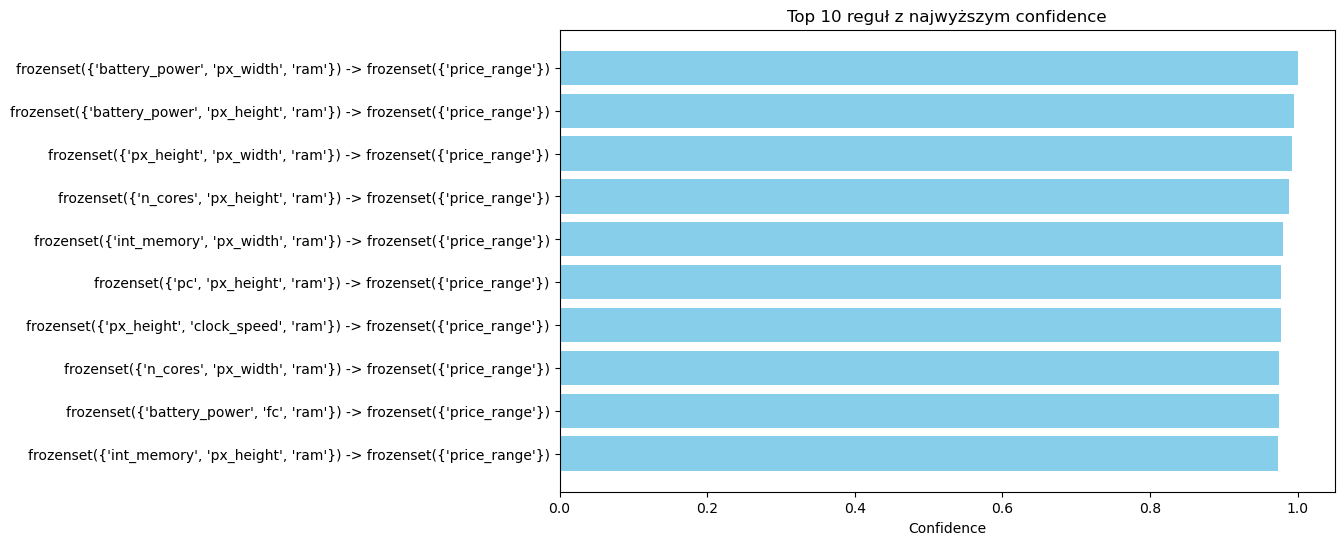

In [31]:
plt.figure(figsize=(10, 6))
plt.barh(top_rules['antecedents'].astype(str) + ' -> ' + top_rules['consequents'].astype(str),
         top_rules['confidence'], color='skyblue')

plt.xlabel('Confidence')
plt.title('Top 10 reguł z najwyższym confidence')
plt.gca().invert_yaxis()
plt.show()


## Wnioski

Reguły asocjacyjne wykazują, że określone cechy, takie jak ram, battery_power, px_width, mają kluczowy wpływ na cenę urządzenia. Wysokie wartości na poziomie niemalże 100% confidence i 2 lift pokazują, że te cechy skutecznie decydują o cenie telefonu.